In [1]:
import os
import scipy.io
from pathlib import Path
from pyannote.core.annotation import Annotation
from pyannote.core.segment import Segment
from pyannote.core.timeline import Timeline

In [2]:
audio_dir = "primock57/output/mixed_audio"
def get_uem_from_uri(uri):
    fs, wav = scipy.io.wavfile.read(os.path.join(audio_dir, f"{uri}.wav"))
    uem = Timeline()
    uem.add(Segment(0, wav.shape[0] / fs))
    return uem

def get_annotations_from_timestamps(timestamps_path):
    data = {}
    for txt_file in Path(timestamps_path).glob("*.txt"):
        uri = txt_file.stem
        if not uri in ["day5_consultation07", "day5_consultation08", "day5_consultation09", "day5_consultation10", "day5_consultation11", "day5_consultation12"]:
            continue
        data[uri] = Annotation(uri=uri, modality=None)
        with open(txt_file, 'r') as f:
            lines = f.readlines()
        for ind, line in enumerate(lines):
            st, en, spk_id = line.strip().split(",")
            data[uri][Segment(float(st), float(en)), ind + 1] = spk_id
    return data

[[ 00:00:00.000 -->  00:08:09.240]]


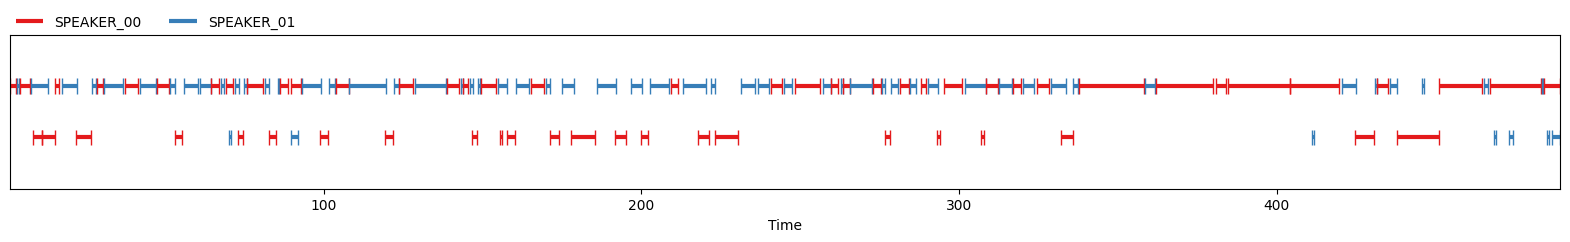

In [3]:
ref_gt = get_annotations_from_timestamps("primock57/output/timestamps")
print(get_uem_from_uri('day5_consultation07'))
ref_gt['day5_consultation07']

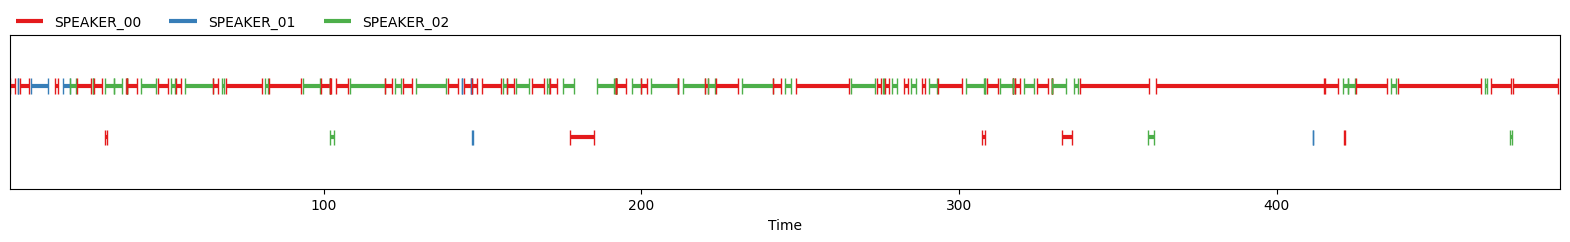

In [4]:
hyp_pretrained = get_annotations_from_timestamps("timestamps_pyan_diar_pretrained")
hyp_pretrained['day5_consultation07']

In [10]:
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()

for uri in ref_gt.keys():
    ref, hyp = ref_gt[uri], hyp_pretrained[uri]
    metric(ref, hyp, uem=get_uem_from_uri(uri))
print(f"The pretrained pipeline reaches a Diarization Error Rate (DER) of {100 * abs(metric):.1f}%")

The pretrained pipeline reaches a Diarization Error Rate (DER) of 23.7%


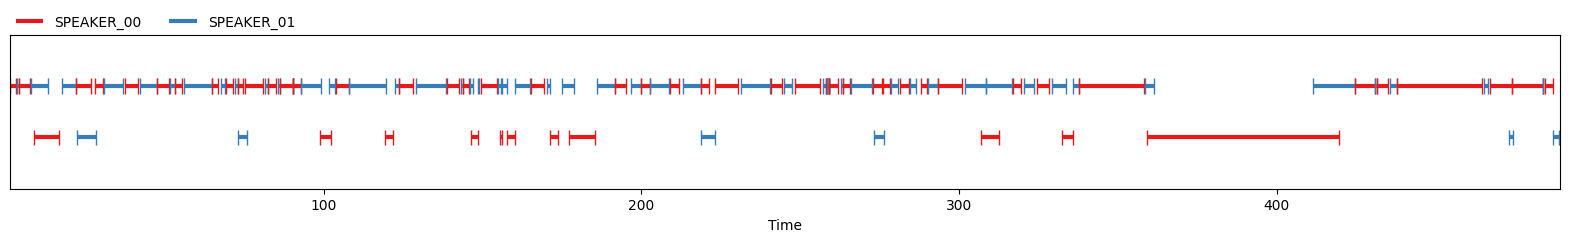

In [11]:
hyp_finetuned = get_annotations_from_timestamps("timestamps_pyan_diar_finetuned")
hyp_finetuned['day5_consultation07']

In [12]:
metric = DiarizationErrorRate()

for uri in ref_gt.keys():
    ref, hyp = ref_gt[uri], hyp_finetuned[uri]
    metric(ref, hyp, uem=get_uem_from_uri(uri))
print(f"The finetuned pipeline reaches a Diarization Error Rate (DER) of {100 * abs(metric):.1f}%")

The finetuned pipeline reaches a Diarization Error Rate (DER) of 16.6%


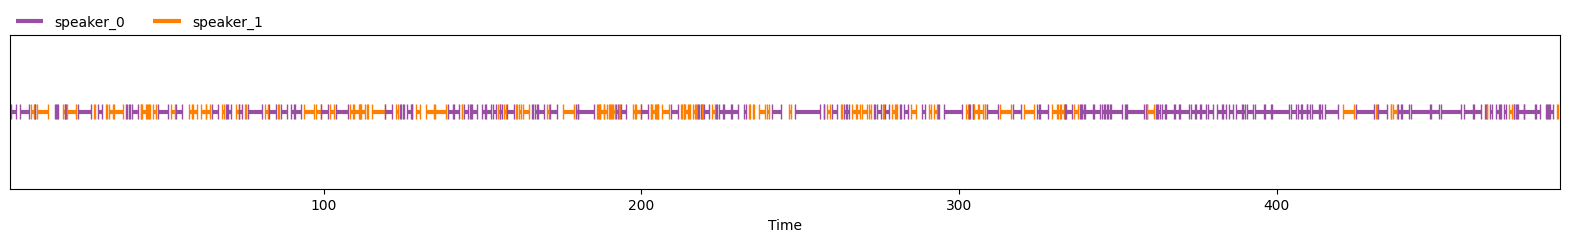

In [14]:
hyp_nemo = get_annotations_from_timestamps("timestamps_nemo_pretrained")
hyp_nemo['day5_consultation07']

In [15]:
metric = DiarizationErrorRate()

for uri in ref_gt.keys():
    ref, hyp = ref_gt[uri], hyp_nemo[uri]
    metric(ref, hyp, uem=get_uem_from_uri(uri))
print(f"The NeMO pretrained pipeline reaches a Diarization Error Rate (DER) of {100 * abs(metric):.1f}%")

The NeMO pretrained pipeline reaches a Diarization Error Rate (DER) of 31.9%
